# Exercises


In [1]:
# Importing libraries 
import utils 
import numpy as np
import matplotlib.pyplot as plt 

## Exercise 1.2
Suppose that we use a perceptron to detect spam messages. Let's say that each email message is represented by the frequency of ocurrence of keywords, and the output is $+1$ if the message is considered spam.

1. Can you think of some keywords that will end up with a large positive weight in the perceptron?
2. How a bout keywords that wil l get a negative weight?
3. What parameter in the perceptron d i rectly affects how many border­
   line messages end up being classified as spam ?

**Solution**
1. Keywords that are commonly could be words like ,'promotion', 'sales', 'free','discount','earn' and more words that want to sell something.
2. A legit message probably have words like 'work', 'job', 'deadline',names and personal or technical information.

3. The bias is the principal parameter who affects how many messages are classified as spam or not, it's under some point of view a threshold that determines when a message is or not spam.

## Exercise 1.3

The weight update rule in **(1.3)** has the nice interpretation that it moves in the direction of classifying $\textbf{x}(t)$ correctly. 

1. Show that $y(t)\textbf{W}^{T}(t)\textbf{x}(t)<0$.
2. Show that $y(t)\textbf{W}^{T}(t+1)\textbf{x}(t)> y(t)\textbf{W}^{T}(t) \textbf{x}(t)$. 
3. As far as classifying  $ \textbf{x}(t)$ is concerned,argue that the move from $\textbf{w}(t)$ to $\textbf{w}(t+1)$ is a move 'in the right direction'.

**Solution**

1. If $\textbf{x}(t)$ is missclassified then $\textbf{W}^{T}(t)\textbf{x}(t)<0$ has a contrary sign to $y(t)$ that implies that $y(t)\textbf{W}^{T}(t)\textbf{x}(t)<0$

2. It's important to mention that $y(t)$ it's an scalar, now we can start with 

$$\begin{aligned}
 y(t)\textbf{W}^{T}(t+1)\textbf{x}(t)& = y(t)(\textbf{W}(t) + y(t)x(t))^{T}x(t)\\
                                     & =  y(t)(\textbf{W}^{T}(t) + y(t)x(t)^{T})x(t)\\
                                     & =  y(t)\textbf{W}^{T}(t)x(t) + y(t)^{2} x(t)^{T}x(t)\\
                                     & =  y(t)\textbf{W}^{T}(t)x(t) +y(t)^{2}\mid \mid x\mid \mid^{2}  \\
                                     & \geq y(t)\textbf{W}^{T}(t)x(t) \hspace{5em} \text{  That is because } y(t)^{2}\mid \mid x\mid \mid^{2}\geq 0
    \end{aligned}$$
3. First we are going to considerate the direction in that $\textbf{W}$ is moving, to do this we can use that $\textbf{W}(t+1)-\textbf{W}(t)= y(t)x(t)$ that is $W$ is moving in the direction $y(t)x(t)$ in each step and therefore is in $y(t)x(t)$ where we want to see the direction is correct, we can understand this movement like if $y(t)=-1$ then $w$ goes in contrary direction of the point $x(t)$ then this particular point is 'left out' with an analogous reasoning we see that if $y(t)=+1$ then $x(t)$ is 'left inside' in this way the algorithm captures in one side the set $P$ where $$P=\{x(t)| y(t)=1 \hspace{1em}\text{for the same t} \}$$

With the above we can conclude that $W$ is going in the 'right direction' in each step.


## Exercise 1.10

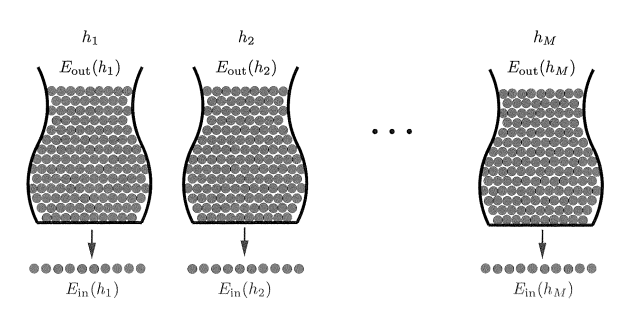

Figure 1.10

Here is an experiment that illustrates the difference between a sinble bin and multiple bins. Run a computer simulation flipping $1000$ fair coins.Flip each coin independently $10$ times. Let's focus on $3$ coins as follows:
$c_{1}$ is the first coin flipped: $c_{rand}$ is a coin you choose at random; $c_{min}$ is the coint that had the minimum frequency of heads(pick the earlier one in case of a tie). Let $v_{1},v_{rand}$ and $v_{min}$ be the fraction of heads you obtain for the respective three coins.

1. What is $\mu $ for the three coins selected?
2. Repeat this entire experiment a large number of times to get several instances of $v_{1},v_{rand}$ and $v_{min}$. Notice that which coins end up being $c_{min}$ may differ from one run to another.
3. Using (2), plot estimates for $\mathbb{P}[|v-\mu|>\varepsilon]$ as a function of $\varepsilon$, together with the Hoeffding bound $2e^{-2\varepsilon^{2} N }$.

4. Which coins obey the Hoeffding bound, and which ones do not? explain why.

5. Relate part (4) to the multiple bins in Figure 1.10

**Solution**

1. If the coins are fair $\mu$ has to be $0.5$

In [2]:
number_of_coins=1000
number_of_flips=10
utils.flip_coins(number_of_coins,number_of_flips,True)

Frequency of first coin: 0.7
Frequency and id of a random coin: id=472,freq=0.5
Frequency and id of the coin with minimum frequency: id=59,freq=0.1


(0.7, 0.5, 0.1)

2. 

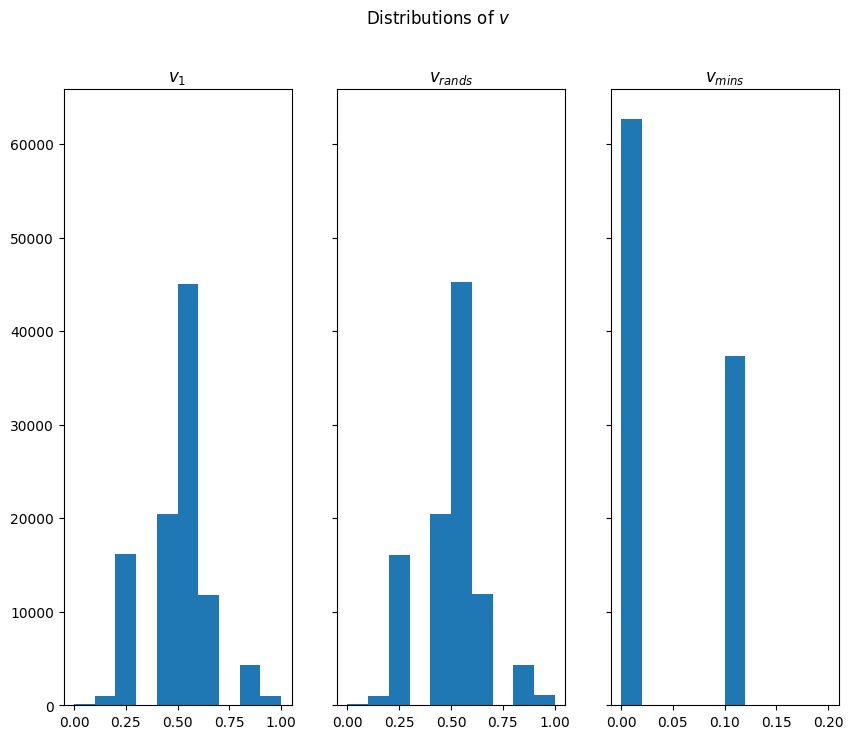

In [3]:
iterations=100000
v1s, vrands, vmins=utils.run_experiment(number_of_coins,number_of_flips,iterations)

3. 

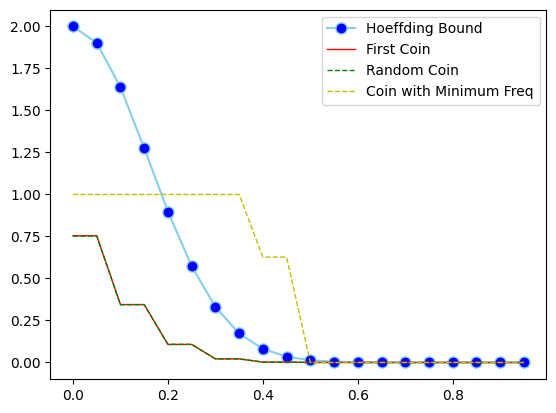

In [5]:
hf_bound =lambda epsilon ,N : 2*np.exp(-2*N*epsilon**2)
eval = lambda  sample,real,epsilon, N : np.sum(np.abs(sample-real) > epsilon)/N

epsilons = np.arange(0.0,1,0.05)
bound= hf_bound(epsilons,number_of_flips)
p1, prand, pmin = np.zeros(len(epsilons)),np.zeros(len(epsilons)),np.zeros(len(epsilons))

for i in range(epsilons.shape[0]):
    e= epsilons[i]
    p1[i] = eval(v1s,0.5,e,iterations)
    pmin[i]= eval(vmins,0.5,e,iterations)
    prand[i]=eval(vrands,0.5,e,iterations)

plt.plot(epsilons, bound, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', label='Hoeffding Bound')
plt.plot(epsilons, p1, marker='', color='r', linewidth=1, label='First Coin')
plt.plot(epsilons, prand, marker='', color='g', linewidth=1, linestyle='dashed', label='Random Coin')
plt.plot(epsilons, pmin, marker='', color='y', linewidth=1, linestyle='dashed', label='Coin with Minimum Freq')
plt.legend()

4. The coin with minimum frequency is chosen after the experiment and therefore does not satisfy a fundamental condition of Hoeffding's inequality, which is satisfied for fixed hypotheses, and this transform the problem from a probabilistic ones to a deterministic because we now know the sample.

5. In this case it is as if we were to sample each bin and then choose a particular bin, this makes it a deterministic and non-probabilistic problem and therefore no guarantees can be made and Hoeffding's inequality does not apply.

## Exercise 1.11

We are given a dataset $\textit{D}$ of $25$ training examples from an unknown target function $f: \textit{X} \rightarrow \textit{Y}$, where $\textit{X}=\mathbb{R}$ and $\textit{Y}= \{ -1,+1 \}$. To learn $f$, we use a simple hypothesis set $\textit{H}= \{ h_{1},h{2} \}$ where $h_{1}$ is the constant $+1$ function and $h_{2}$ is the constant $-1$.

We consider two learning algorithms, S(smart) and C (crazy). S chooses the hypotesis that agrees the most with $\textit{D}$ and C chooses the other hypotesis deliberately. Let us see how these algorithms perform out of sample from the determinnistic and probabilistics points of view. Assume in the probabilistic view that ther is a probability distribution on $\textit{X}$, and let $\mathbb{P}[f(x)=+1]=p$.

1. Can S produce a hypotesis that is guaranteed to perform better than random on any point outside $\mathit{D}$?

2. Assume for the rest of the exercise that all the examples in $\textit{D}$ have $y_{n}=+1$. Is it possible that the hypothesis that C produces turns out to be better than the hypothesis that S produces?

3. If $p=0.9$, what is the probability that S will produce a better hypothesis than C?

4. Is there any value of $p$ for which it is more likely than not that C will produce a better hypothesis thant S?

**Solution**

1. No, first S transform the problem in a deterministic problem, that is, is taking the hypothesis after the sample creating a deterministic problem, in other hand if the data $\textit{D}$ have $ y=-1$ for all $y$ then the algorithm takes $h_{2}$ and we could think on a case that the new data may have $y=1$ for all new data.
2. Yes is an analogous case for the first point, the crazy algorithm C have the advantage that it fixes the hypothesis before the experiment for this we can use the Hoeffding bound and give a guarantee for the new data.
3. In this case the probability $\omega$ that C choose the right hypothesis and the probability that S select the hypothesis $h_{1}$ is $p=0.9$ now the probability of this two coincide is $p\omega$  if $\omega=0.5$ then the probability of S produce a better hypothesis that C is $p\omega$ or in our case $(0.9)(0.5)=0.45$ 

4. For all $p<1$

## Exercise 1.12

A friend comes to you with a learning problem.She says the target function $f$ is completely unknown,but she has $4000$ data points. She is willing to pay you to solve her problem and produce for her a function $g$ which approximates $f$.What is the best that you can promise her among the following:

1. After learning you will provide her with a $g$ that you will guarantee approximates $f$ well out of the sample.
2. After learning you will provide her with a $g$, and with high probability the $g$ which you produce will approximate $f$ well out of the sample.
3. One of two things will happen.
    1. You will produce a hypothesis $g$.
    2. You will declare that you failed.

    if you do return a hypothesis $g$ , then with high probability the $g$ which you produce will approximate $f$ well out of sample.

**Solution**

The best i can promise her is 3. because i can't guarantee 1  because i could have a data $ \textit{D}$ who is not representative for a problem, for example a problem with 1000 parameters (like an image) then i can't guarantee generalization, the same for 2, but in 3. i can guarantee a hypothesis $g$ that if have a coherent number of parameters and the function $f$ is not look so complex, then i can give her $g$.